In [1]:
%matplotlib notebook

In [2]:
import matplotlib.ticker

In [42]:
frame = pd.read_csv("sampling-frame.tsv", sep = "\t")
frame.head()

,user,home_proj,global_edits,project_group,project_domain
0,! Bikkit !,dewiki,219.0,dewiki,de.wikipedia.org
1,!NewLondon31,jawiki,46.0,jawiki,ja.wikipedia.org
2,!Silent,ptwiki,20688.8,ptwiki,pt.wikipedia.org
3,"""Colorado Campeão""!",ptwiki,417.0,ptwiki,pt.wikipedia.org
4,"""quasi"" tuttologo",itwiki,117.0,itwiki,it.wikipedia.org


# Segementation

In [43]:
pd.DataFrame(frame["project_group"].value_counts())

,project_group
enwiki,18004
dewiki,3825
cee_wps,3544
jawiki,3151
frwiki,3058
commons,2599
eswiki,2426
ruwiki,2312
other,1900
zhwiki,1876


In [128]:
# Round the highest edit count up to the nearest hundred thousand,
# in order to make a pretty edge for the top bin
top_edge = int(np.ceil(frame["global_edits"].max() / 100000) * 100000)

# Evenish sized edit bins
e_edit_bins = [10, 30, 150, 600, 1350, 3800, top_edge]

# Normalish sized edit bins
n_edit_bins = [10, 30, 100, 600, 6000, 12000, top_edge]

frame["e_binned_edits"] = pd.cut(frame["global_edits"], e_edit_bins, right=False)
frame["n_binned_edits"] = pd.cut(frame["global_edits"], n_edit_bins, right=False)

In [129]:
frame["e_binned_edits"].value_counts(sort = False)

[10, 30)            2792
[30, 150)          14299
[150, 600)         14578
[600, 1350)         6953
[1350, 3800)        6873
[3800, 1100000)     6734
Name: e_binned_edits, dtype: int64

In [130]:
frame["n_binned_edits"].value_counts(sort = False)

[10, 30)             2792
[30, 100)            9971
[100, 600)          18906
[600, 6000)         16096
[6000, 12000)        2374
[12000, 1100000)     2090
Name: n_binned_edits, dtype: int64

In [131]:
frame.groupby(["project_group", "e_binned_edits"]).size().unstack()

e_binned_edits,"[10, 30)","[30, 150)","[150, 600)","[600, 1350)","[1350, 3800)","[3800, 1100000)"
project_group,,,,,,
arwiki,26,94,96,67,62,67
asia_wps,94,452,498,280,279,250
cee_wps,170,830,946,479,561,558
commons,57,304,481,345,500,912
dewiki,141,982,1094,566,573,469
enwiki,1104,5682,5318,2234,1988,1678
eswiki,166,681,703,343,296,237
frwiki,175,810,823,420,440,390
itwiki,88,549,487,248,198,196


In [132]:
frame.groupby(["project_group", "n_binned_edits"]).size().unstack()

n_binned_edits,"[10, 30)","[30, 100)","[100, 600)","[600, 6000)","[6000, 12000)","[12000, 1100000)"
project_group,,,,,,
arwiki,26,67,123,151,24,21
asia_wps,94,319,631,658,81,70
cee_wps,170,580,1196,1242,215,141
commons,57,224,561,1015,252,490
dewiki,141,662,1414,1323,178,107
enwiki,1104,4002,6998,4815,615,470
eswiki,166,459,925,737,86,53
frwiki,175,573,1060,991,153,106
itwiki,88,383,653,513,74,55


# Distribution of yearly edit counts

<IPython.core.display.Javascript object>


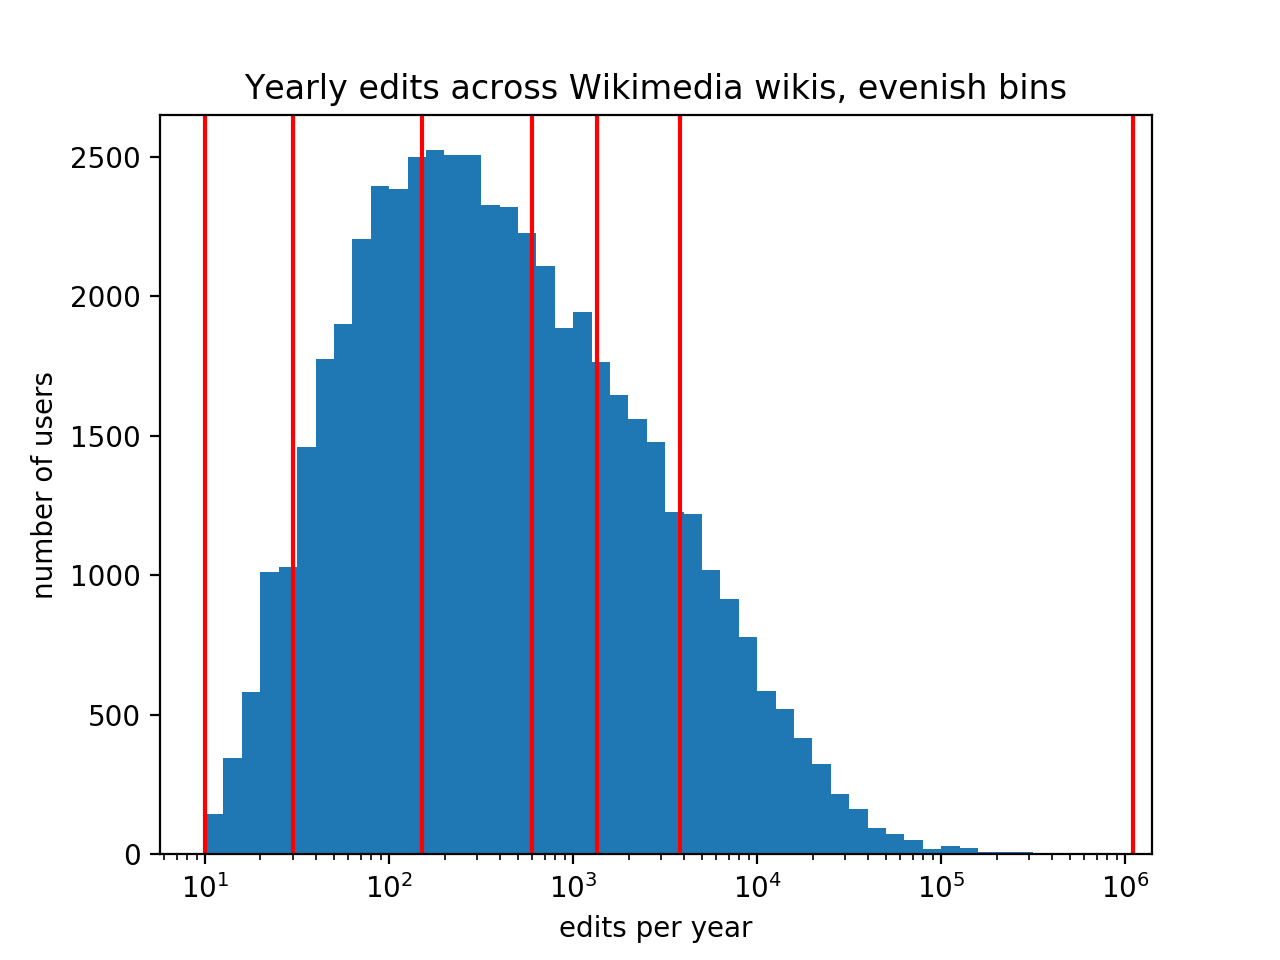

In [136]:
plt.hist(
    frame["global_edits"],
    bins = 10**np.arange(1, 6, 0.1),
)

plt.xscale("log", basex = 10)
for edge in e_edit_bins:
    plt.axvline(x=edge, color = "red")

plt.title("Yearly edits across Wikimedia wikis, evenish bins")
plt.xlabel("edits per year")
plt.ylabel("number of users")
plt.show()

<IPython.core.display.Javascript object>


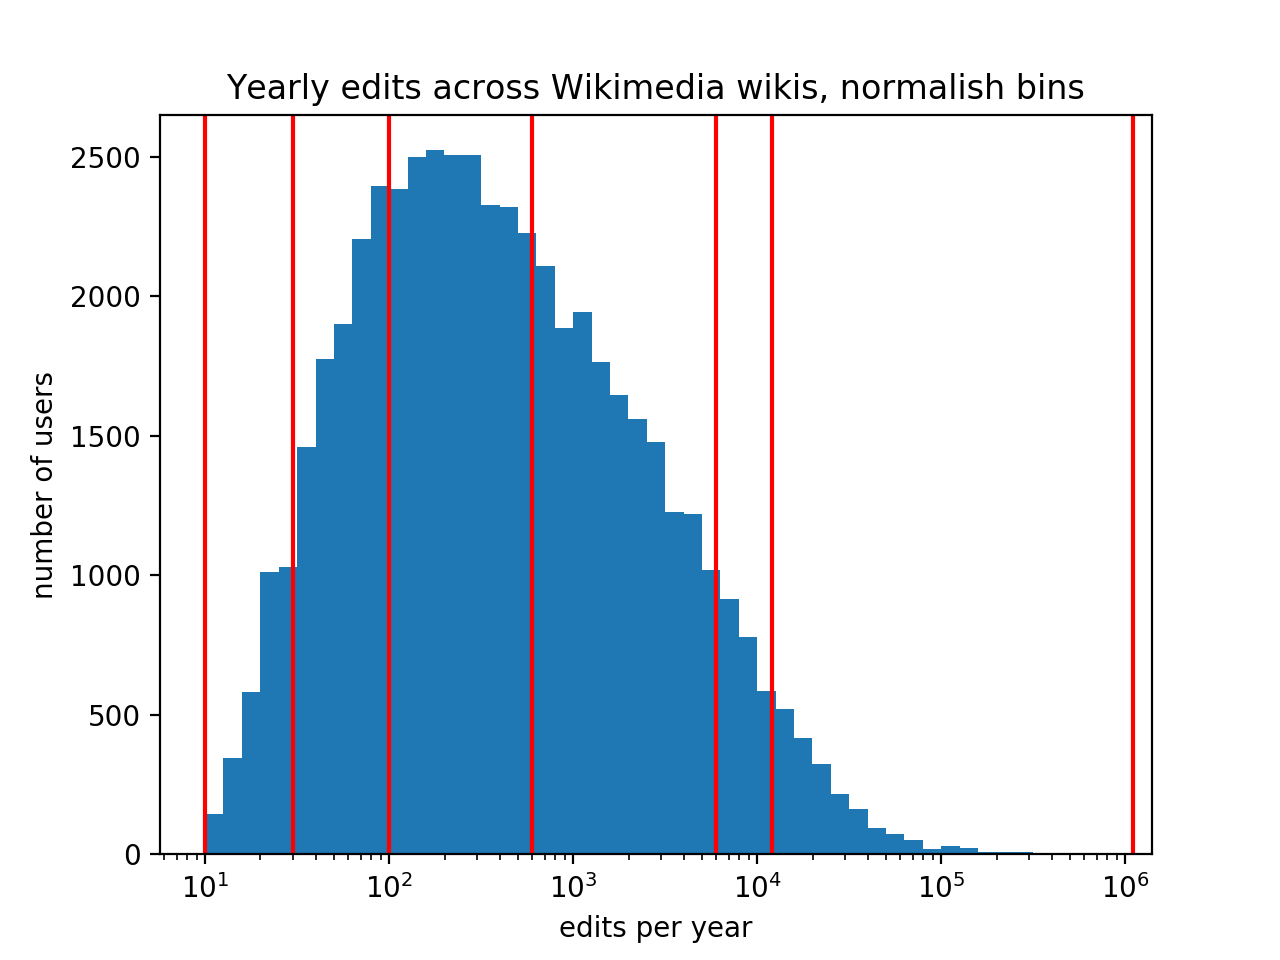

In [134]:
plt.hist(
    frame["global_edits"],
    bins = 10**np.arange(1, 6, 0.1),
)

plt.xscale("log", basex = 10)
for edge in n_edit_bins:
    plt.axvline(x=edge, color = "red")

plt.title("Yearly edits across Wikimedia wikis, normalish bins")
plt.xlabel("edits per year")
plt.ylabel("number of users")
plt.show()

## Cumulative histogram

<IPython.core.display.Javascript object>


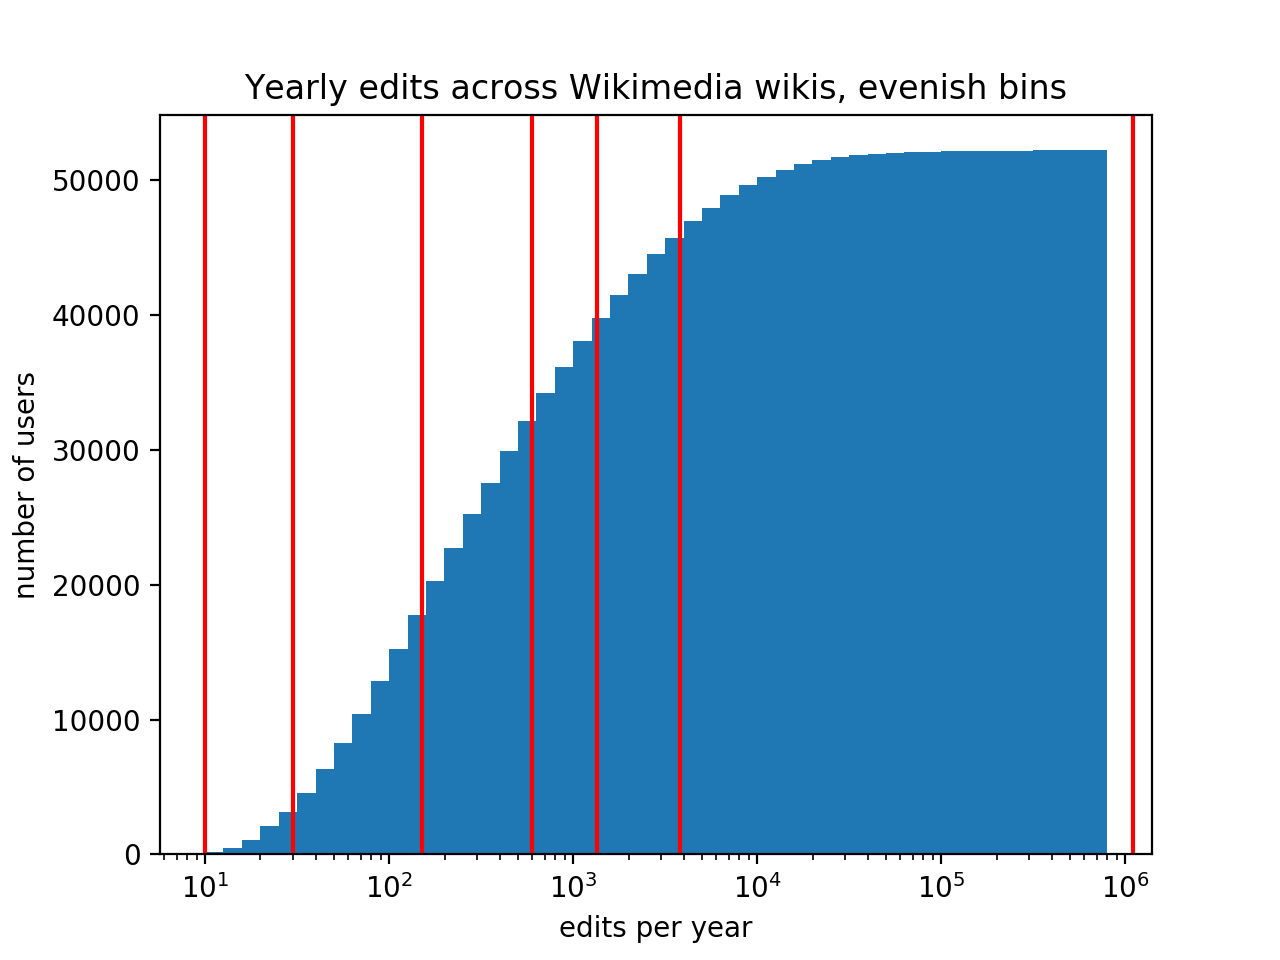

In [135]:
plt.hist(
    frame["global_edits"],
    bins = 10**np.arange(1, 6, 0.1),
    cumulative = True
)

plt.xscale("log", basex = 10)
for edge in e_edit_bins:
    plt.axvline(x=edge, color = "red")

plt.title("Yearly edits across Wikimedia wikis, evenish bins")
plt.xlabel("edits per year")
plt.ylabel("number of users")
plt.show()

<IPython.core.display.Javascript object>


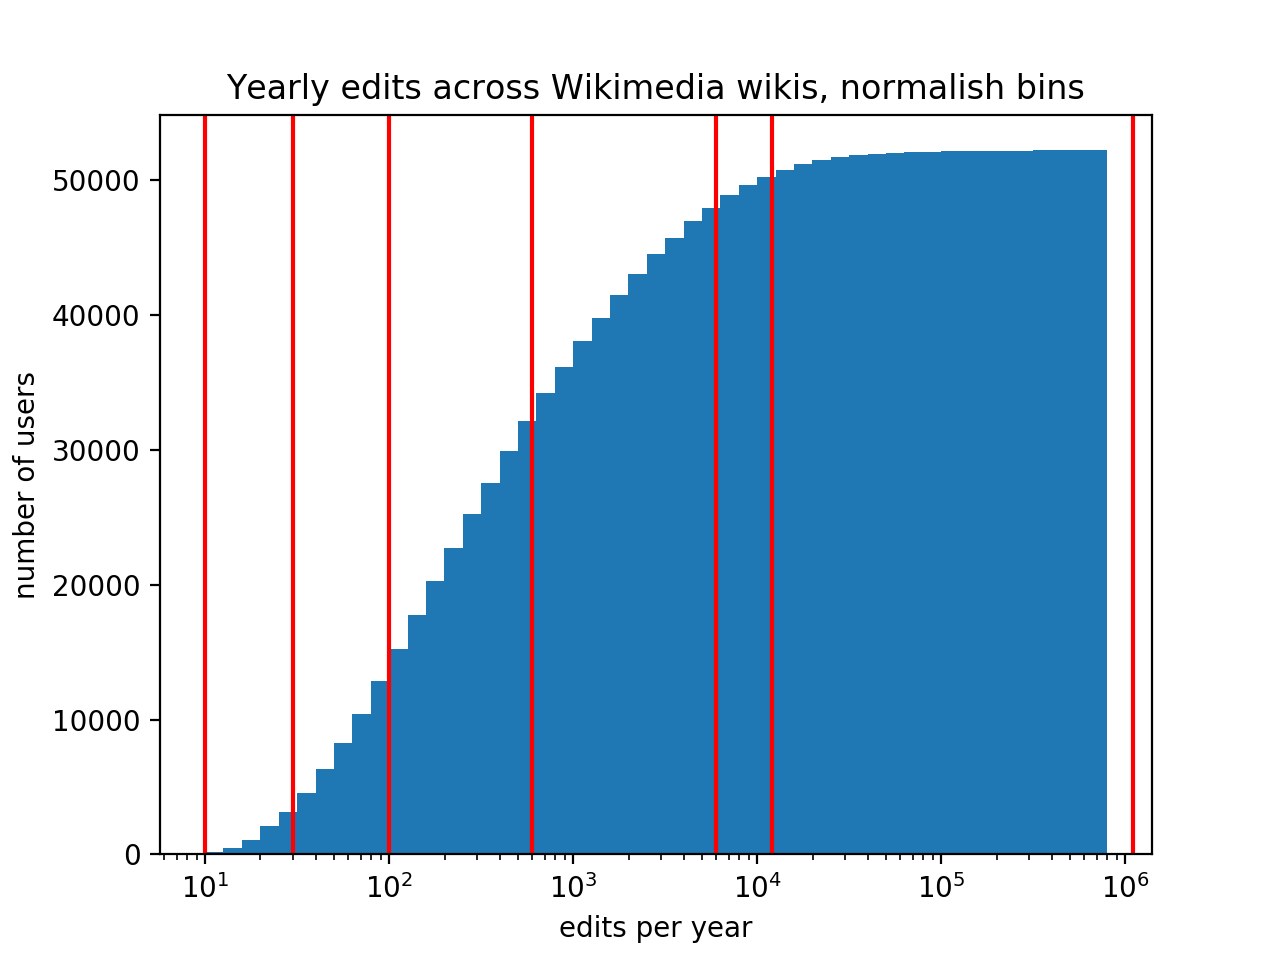

In [92]:
plt.hist(
    frame["global_edits"],
    bins = 10**np.arange(1, 6, 0.1),
    cumulative = True
)

plt.xscale("log", basex = 10)
for edge in n_edit_bins:
    plt.axvline(x=edge, color = "red")

plt.title("Yearly edits across Wikimedia wikis, normalish bins")
plt.xlabel("edits per year")
plt.ylabel("number of users")
plt.show()